In [20]:
# load CovidData.csv into a pandas dataframe

import pandas as pd

df = pd.read_csv('CovidData.csv')
covid_data = pd.read_csv('CovidData.csv')

# Display the first few rows of the dataframe to understand its structure
covid_data.head()



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [21]:
# Replace coded values in the 'PREGNANT' column
covid_data['PREGNANT'] = covid_data['PREGNANT'].replace({97: 'Not Applicable', 98: 'Unknown', 99: 'Unknown', 1: 'Pregnant', 2: 'Not Pregnant'})

# Filter out non-applicable and unknown pregnancy data
pregnancy_covid_data = covid_data[covid_data['PREGNANT'].isin(['Pregnant', 'Not Pregnant'])]

# Focus on a few relevant columns
columns_of_interest = ['SEX', 'AGE', 'PREGNANT', 'PNEUMONIA', 'CLASIFFICATION_FINAL']
filtered_data = pregnancy_covid_data[columns_of_interest]

# Check the cleaned and filtered data
filtered_data.head()


,SEX,AGE,PREGNANT,PNEUMONIA,CLASIFFICATION_FINAL
0,1,65,Not Pregnant,1,3
3,1,53,Not Pregnant,2,7
5,1,40,Not Pregnant,1,3
6,1,64,Not Pregnant,2,3
7,1,64,Not Pregnant,1,3


In [22]:
# Count the number of COVID-19 cases in pregnant and non-pregnant individuals
case_counts = filtered_data['PREGNANT'].value_counts()

# Severity distribution in pregnant vs non-pregnant individuals
severity_distribution = filtered_data.groupby('PREGNANT')['CLASIFFICATION_FINAL'].value_counts().unstack().fillna(0)


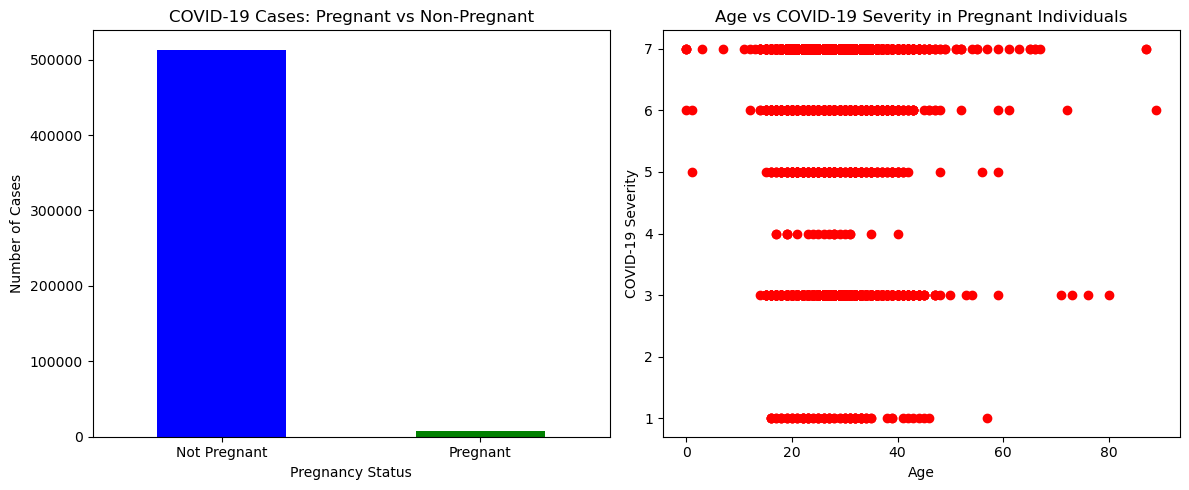

In [23]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 5))

# Bar chart for case counts
plt.subplot(1, 2, 1)
case_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('COVID-19 Cases: Pregnant vs Non-Pregnant')
plt.xlabel('Pregnancy Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

# Scatter plot for Age vs Severity in Pregnant individuals
plt.subplot(1, 2, 2)
pregnant_data = filtered_data[filtered_data['PREGNANT'] == 'Pregnant']
plt.scatter(pregnant_data['AGE'], pregnant_data['CLASIFFICATION_FINAL'], color='red')
plt.title('Age vs COVID-19 Severity in Pregnant Individuals')
plt.xlabel('Age')
plt.ylabel('COVID-19 Severity')
plt.tight_layout()

plt.show()


In [24]:
# Handle missing or coded values in the 'DIABETES' column
# Assuming '1' indicates diabetes, '2' indicates no diabetes, and other codes are for missing/unknown data
covid_data['DIABETES'] = covid_data['DIABETES'].replace({97: 'Unknown', 98: 'Unknown', 99: 'Unknown', 1: 'Diabetes', 2: 'No Diabetes'})

# Filter the data to include only known diabetes statuses
filtered_data = covid_data[covid_data['DIABETES'].isin(['Diabetes', 'No Diabetes'])]

# Select relevant columns for analysis
columns_of_interest = ['SEX', 'AGE', 'DIABETES', 'PNEUMONIA', 'CLASIFFICATION_FINAL']
analysis_data = filtered_data[columns_of_interest]


In [ ]:
# Count the number of COVID-19 cases in individuals with and without diabetes
case_counts_diabetes = analysis_data['DIABETES'].value_counts()


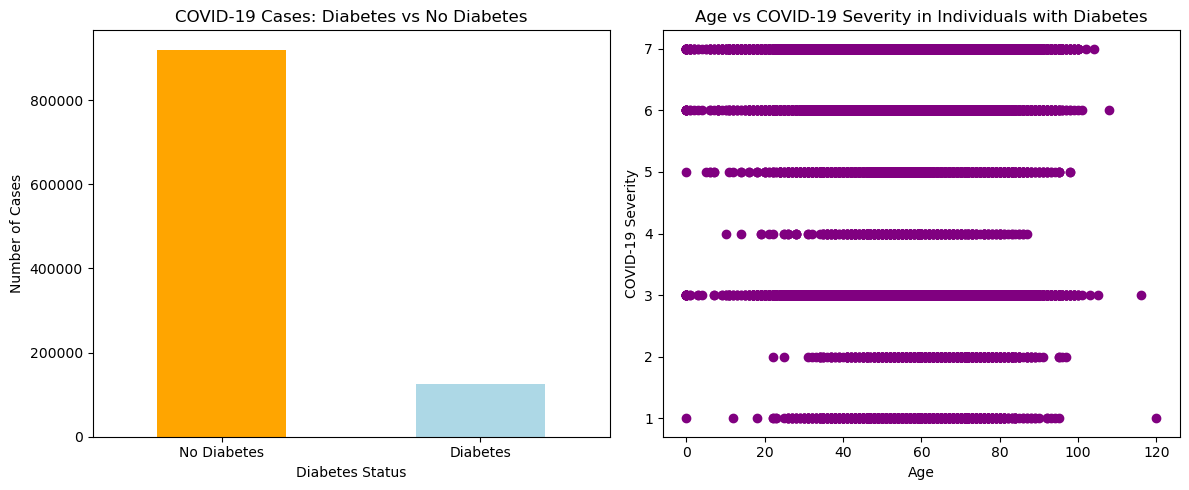

In [ ]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 5))

# Bar chart for diabetes case counts
plt.subplot(1, 2, 1)
case_counts_diabetes.plot(kind='bar', color=['orange', 'lightblue'])
plt.title('COVID-19 Cases: Diabetes vs No Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

# Scatter plot for Age vs Severity in individuals with diabetes
plt.subplot(1, 2, 2)
diabetes_data = analysis_data[analysis_data['DIABETES'] == 'Diabetes']
plt.scatter(diabetes_data['AGE'], diabetes_data['CLASIFFICATION_FINAL'], color='purple')
plt.title('Age vs COVID-19 Severity in Individuals with Diabetes')
plt.xlabel('Age')
plt.ylabel('COVID-19 Severity')
plt.tight_layout()

plt.show()


In [ ]:
# Handle missing or coded values in the 'COPD' column
# Assuming '1' indicates COPD, '2' indicates no COPD, and other codes are for missing/unknown data
covid_data['COPD'] = covid_data['COPD'].replace({97: 'Unknown', 98: 'Unknown', 99: 'Unknown', 1: 'COPD', 2: 'No COPD'})

# Filter the data to include only known COPD statuses
filtered_data = covid_data[covid_data['COPD'].isin(['COPD', 'No COPD'])]

# Select relevant columns for analysis
columns_of_interest = ['SEX', 'AGE', 'COPD', 'PNEUMONIA', 'CLASIFFICATION_FINAL']
analysis_data = filtered_data[columns_of_interest]


In [ ]:
# Count the number of COVID-19 cases in individuals with and without COPD
case_counts_copd = analysis_data['COPD'].value_counts()


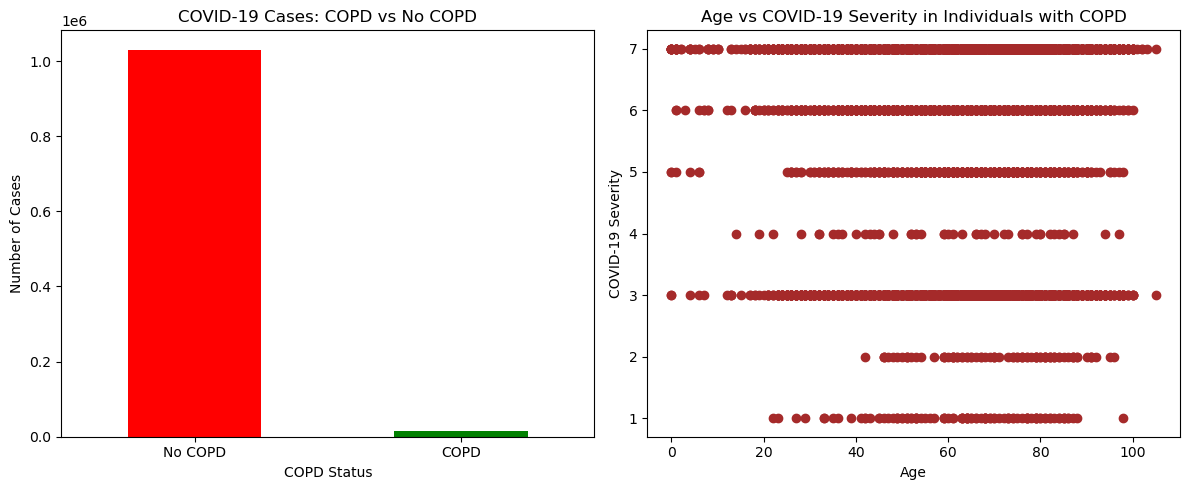

In [ ]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 5))

# Bar chart for COPD case counts
plt.subplot(1, 2, 1)
case_counts_copd.plot(kind='bar', color=['red', 'green'])
plt.title('COVID-19 Cases: COPD vs No COPD')
plt.xlabel('COPD Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

# Scatter plot for Age vs Severity in individuals with COPD
plt.subplot(1, 2, 2)
copd_data = analysis_data[analysis_data['COPD'] == 'COPD']
plt.scatter(copd_data['AGE'], copd_data['CLASIFFICATION_FINAL'], color='brown')
plt.title('Age vs COVID-19 Severity in Individuals with COPD')
plt.xlabel('Age')
plt.ylabel('COVID-19 Severity')
plt.tight_layout()

plt.show()


In [ ]:
# Count the number of COVID-19 cases in individuals with and without COPD
case_counts_copd = analysis_data['COPD'].value_counts()

# Calculate the total number of cases
total_cases = case_counts_copd.sum()

# Calculate the number of cases without COPD
no_copd_cases = case_counts_copd['No COPD']

# Calculate the percentage of cases without COPD
percentage_no_copd = (no_copd_cases / total_cases) * 100

# Print the result
print(f"The percentage of COVID-19 cases without COPD is: {percentage_no_copd:.2f}%")


The percentage of COVID-19 cases without COPD is: 98.56%


In [ ]:
# Count the number of COVID-19 cases in all pregnancy status categories
case_counts_pregnant_all = filtered_data['PREGNANT'].value_counts()

# Calculate the total number of cases
total_cases_all = case_counts_pregnant_all.sum()

# Calculate the percentages for each category
percentages = (case_counts_pregnant_all / total_cases_all) * 100

# Print the results for each category
for category, percentage in percentages.items():
    print(f"The percentage of COVID-19 cases in {category} individuals is: {percentage:.2f}%")


The percentage of COVID-19 cases in Not Applicable individuals is: 49.90%
The percentage of COVID-19 cases in Not Pregnant individuals is: 48.98%
The percentage of COVID-19 cases in Pregnant individuals is: 0.78%
The percentage of COVID-19 cases in Unknown individuals is: 0.34%


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

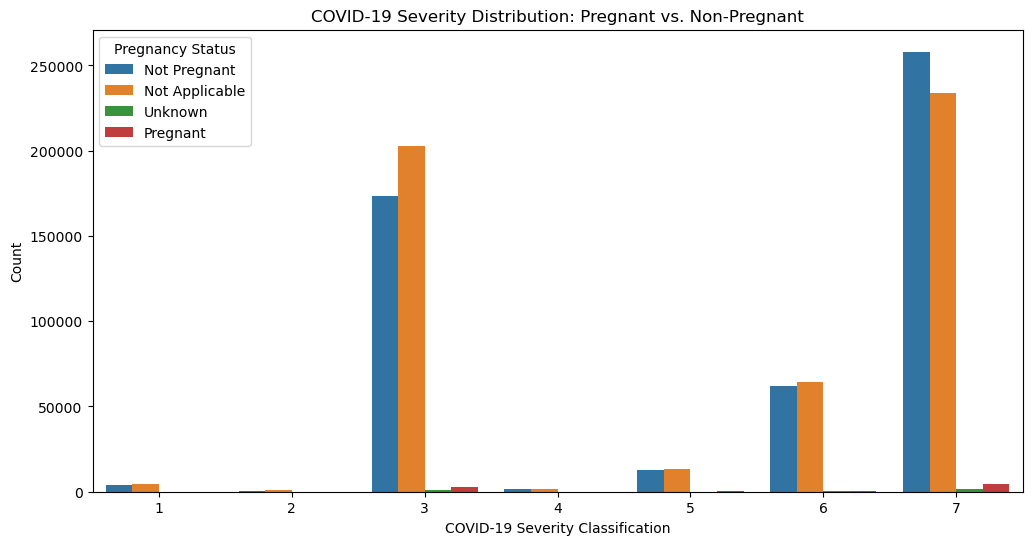

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' DataFrame has 'PREGNANT' and 'CLASIFFICATION_FINAL' columns
plt.figure(figsize=(12, 6))
sns.countplot(x='CLASIFFICATION_FINAL', hue='PREGNANT', data=filtered_data)
plt.title('COVID-19 Severity Distribution: Pregnant vs. Non-Pregnant')
plt.xlabel('COVID-19 Severity Classification')
plt.ylabel('Count')
plt.legend(title='Pregnancy Status')
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

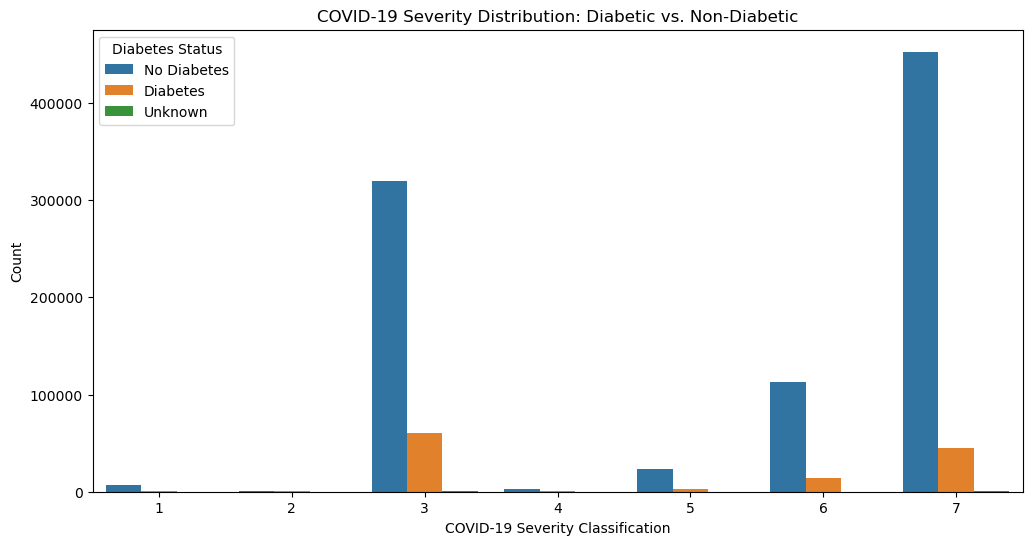

In [ ]:
# Assuming 'filtered_data' DataFrame has 'DIABETES' and 'CLASIFFICATION_FINAL' columns
plt.figure(figsize=(12, 6))
sns.countplot(x='CLASIFFICATION_FINAL', hue='DIABETES', data=filtered_data)
plt.title('COVID-19 Severity Distribution: Diabetic vs. Non-Diabetic')
plt.xlabel('COVID-19 Severity Classification')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()


/var/folders/03/m3k5686n6kv6w7k1dmhmvjgh0000gn/T/ipykernel_59215/134161663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Combined_Status'] = filtered_data.apply(lambda row: f"{row['PREGNANT']}_{row['DIABETES']}_{row['COPD']}", axis=1)
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

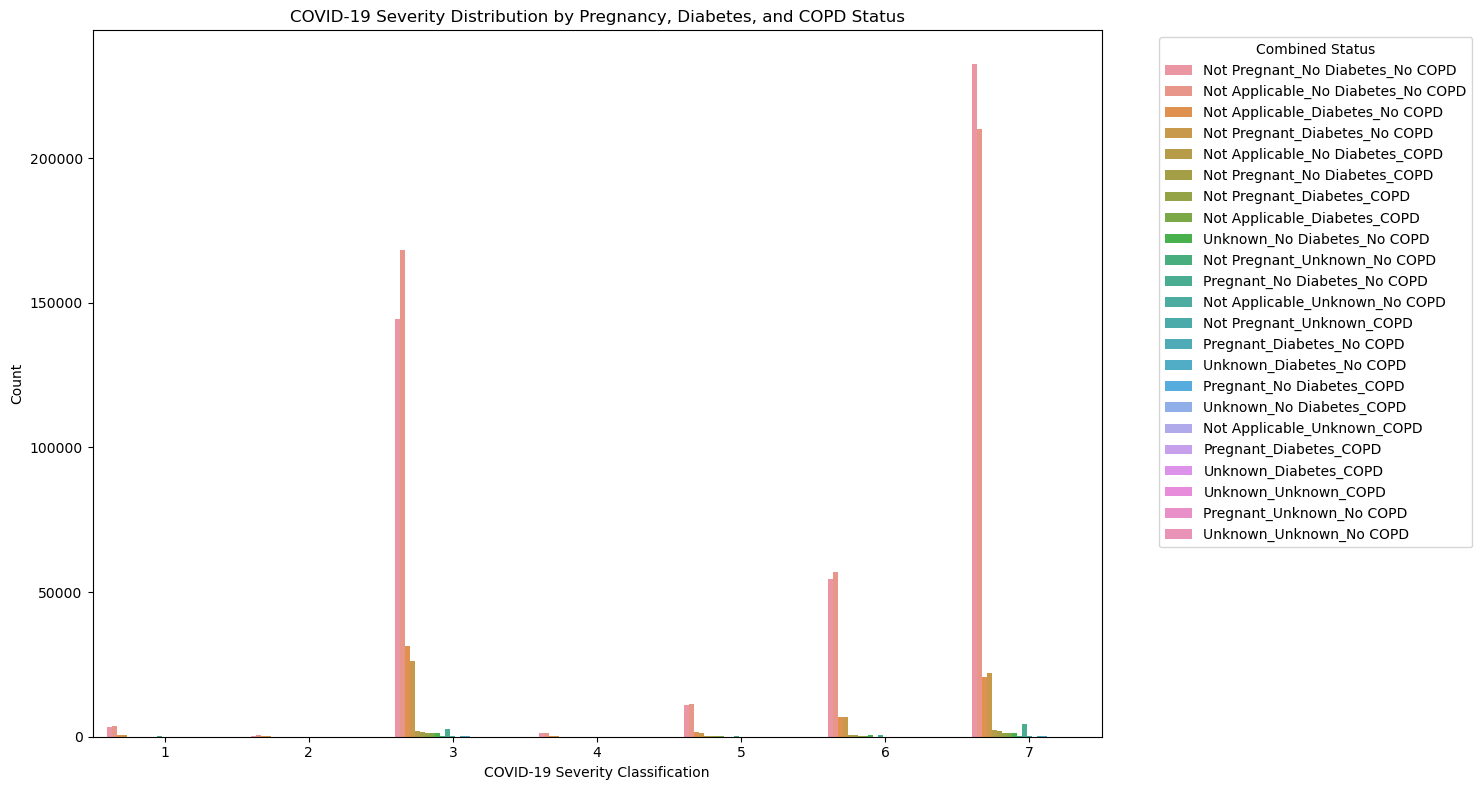

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'filtered_data' DataFrame has 'PREGNANT', 'DIABETES', 'COPD', and 'CLASIFFICATION_FINAL' columns

# Create a new column combining the status of Pregnancy, Diabetes, and COPD
filtered_data['Combined_Status'] = filtered_data.apply(lambda row: f"{row['PREGNANT']}_{row['DIABETES']}_{row['COPD']}", axis=1)

# Plotting the combined chart
plt.figure(figsize=(15, 8))
sns.countplot(x='CLASIFFICATION_FINAL', hue='Combined_Status', data=filtered_data)
plt.title('COVID-19 Severity Distribution by Pregnancy, Diabetes, and COPD Status')
plt.xlabel('COVID-19 Severity Classification')
plt.ylabel('Count')
plt.legend(title='Combined Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

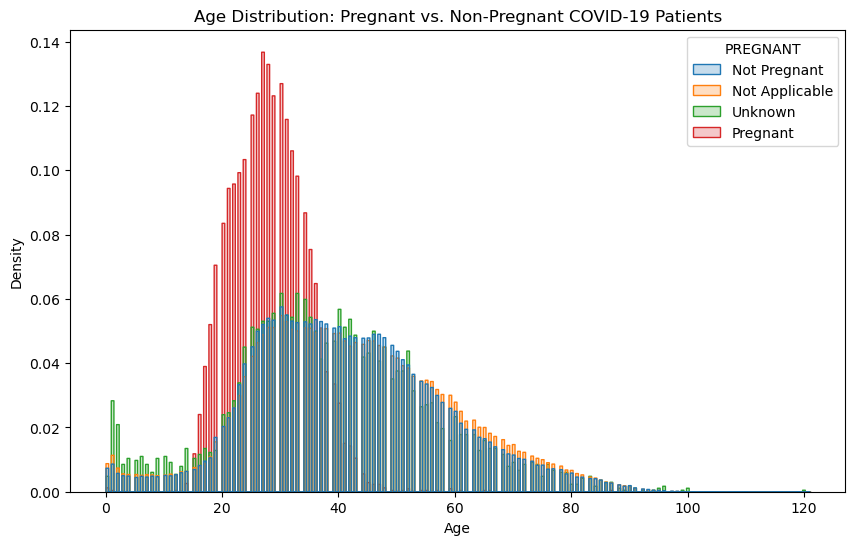

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='AGE', hue='PREGNANT', element='step', stat='density', common_norm=False)
plt.title('Age Distribution: Pregnant vs. Non-Pregnant COVID-19 Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

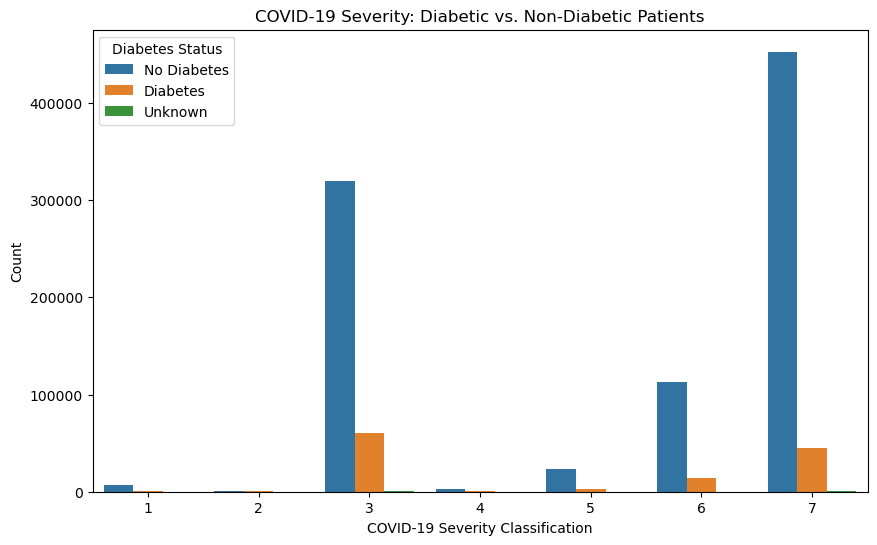

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CLASIFFICATION_FINAL', hue='DIABETES', data=filtered_data)
plt.title('COVID-19 Severity: Diabetic vs. Non-Diabetic Patients')
plt.xlabel('COVID-19 Severity Classification')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


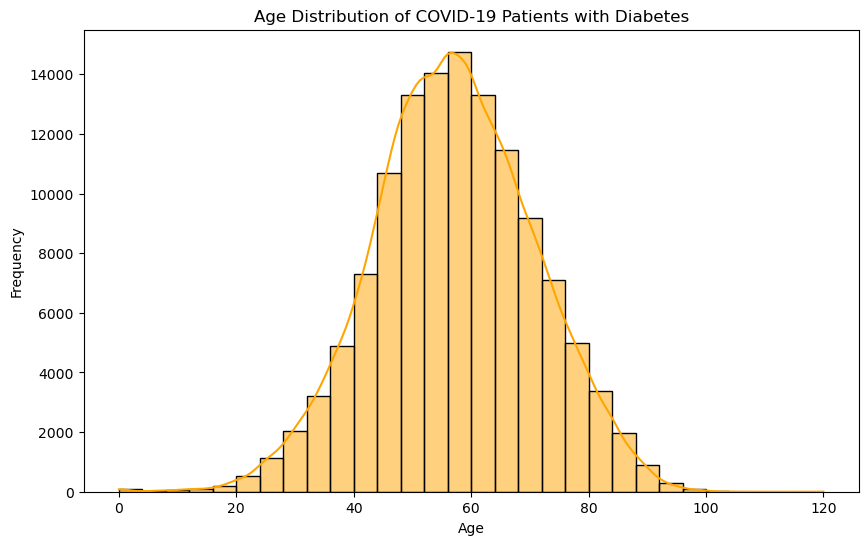

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'CovidData.csv'  # Adjust the path if the file is in a different directory
covid_data = pd.read_csv(file_path)

# Assuming 'DIABETES' column uses 1 for diabetes and 0 or another number for no diabetes
# Filter data for patients with diabetes
diabetes_data = covid_data[covid_data['DIABETES'] == 1]

# Plotting the Age Distribution of COVID-19 Patients with Diabetes
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['AGE'], kde=True, color='orange', bins=30)
plt.title('Age Distribution of COVID-19 Patients with Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


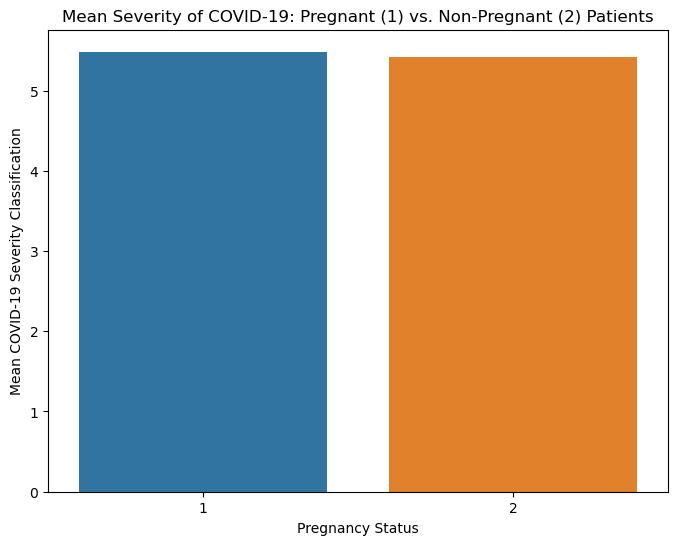

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'CovidData.csv'
covid_data = pd.read_csv(file_path)

# Filter the data to include only categories 1 (Pregnant) and 2 (Non-Pregnant) for the 'PREGNANT' column
filtered_data = covid_data[covid_data['PREGNANT'].isin([1, 2])]

# Calculate mean severity for pregnant (1) and non-pregnant (2) patients
mean_severity = filtered_data.groupby('PREGNANT')['CLASIFFICATION_FINAL'].mean().reset_index()

# Plotting the revised chart
plt.figure(figsize=(8, 6))
sns.barplot(x='PREGNANT', y='CLASIFFICATION_FINAL', data=mean_severity)
plt.title('Mean Severity of COVID-19: Pregnant (1) vs. Non-Pregnant (2) Patients')
plt.xlabel('Pregnancy Status')
plt.ylabel('Mean COVID-19 Severity Classification')
plt.show()

# As per the calculation, the mean severities are approximately 5.48 for pregnant patients and 5.41 for non-pregnant patients.

In [ ]:
# Cross-tabulation of COPD with SEX, AGE, and CLASIFFICATION_FINAL
cross_tab = pd.crosstab(index=covid_data['COPD'], columns=[covid_data['SEX'], covid_data['AGE'], covid_data['CLASIFFICATION_FINAL']], margins=True, margins_name="Total")

# Display the cross-tabulation
cross_tab


SEX                   1                                         ...   2      \
AGE                   0                              1          ... 115 116   
CLASIFFICATION_FINAL  1  2    3   4   5    6     7   1  2    3  ...   7   3   
COPD                                                            ...           
1                     0  0    1   0   1    0     4   0  0    0  ...   0   0   
2                     7  1  339  11  66  154  1161  11  1  243  ...   1   1   
98                    0  0    2   0   0    1     2   0  0    0  ...   0   0   
Total                 7  1  342  11  67  155  1167  11  1  243  ...   1   1   

SEX                                             Total  
AGE                  117 118    120                    
CLASIFFICATION_FINAL   6   6  7   1  5  6  7           
COPD                                                   
1                      0   0  0   0  0  0  0    15062  
2                      1   1  1   1  1  1  1  1030510  
98                     0   0  0   0  0  0  0     3003  
Total                  1   1  1   1  1  1  1  1048575  

[4 rows x 1399 columns]

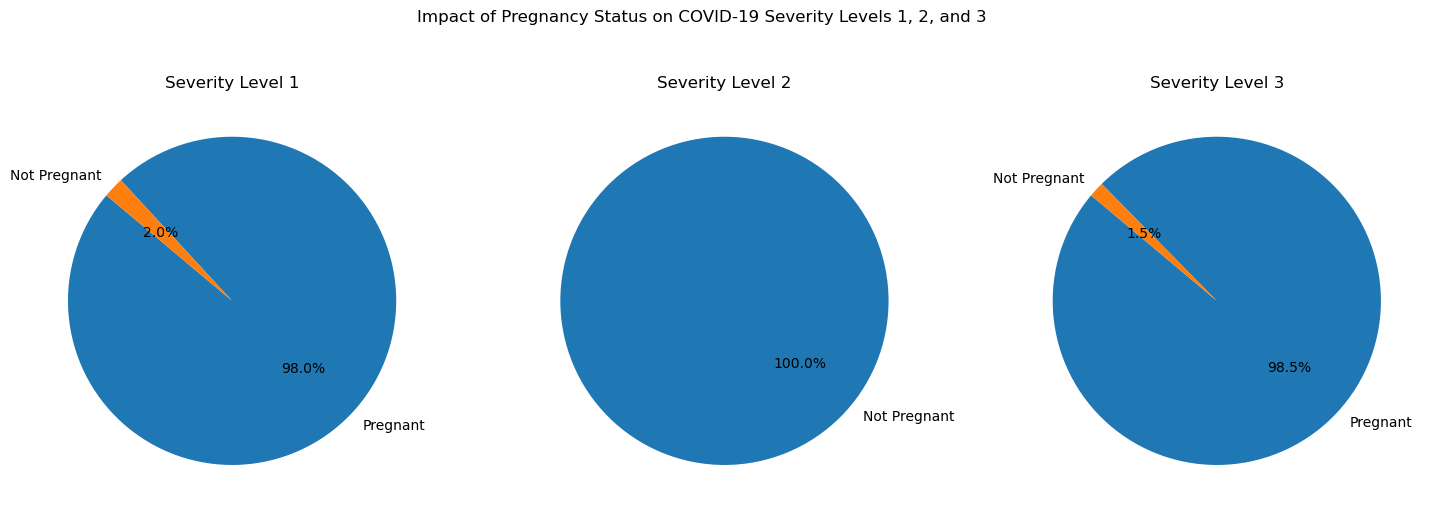

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('CovidData.csv')
covid_data = pd.read_csv('CovidData.csv')

# Filter the data for severity levels 1, 2, and 3
severity_levels = [1, 2, 3]
filtered_data = covid_data[covid_data['CLASIFFICATION_FINAL'].isin(severity_levels)]

# Assuming 'PREGNANT' column: 1 indicates pregnant, 2 indicates not pregnant
# Filter out missing or not applicable data in 'PREGNANT' column
pregnancy_data = filtered_data[(filtered_data['PREGNANT'] == 1) | (filtered_data['PREGNANT'] == 2)]

# Function to create adjusted pie chart for each severity level
def create_adjusted_pie_chart(severity_level, ax):
    # Filter data for the specific severity level
    severity_data = pregnancy_data[pregnancy_data['CLASIFFICATION_FINAL'] == severity_level]

    # Count the instances
    counts = severity_data['PREGNANT'].value_counts()

    # Adjust labels and counts based on available data
    labels = []
    if 1 in counts:
        labels.append('Pregnant')
    if 2 in counts:
        labels.append('Not Pregnant')

    # Create the pie chart
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Severity Level {severity_level}')

# Create a figure with 3 subplots (one for each severity level)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie charts for each severity level
for i, severity_level in enumerate(severity_levels):
    create_adjusted_pie_chart(severity_level, axs[i])

fig.suptitle('Impact of Pregnancy Status on COVID-19 Severity Levels 1, 2, and 3')
plt.show()





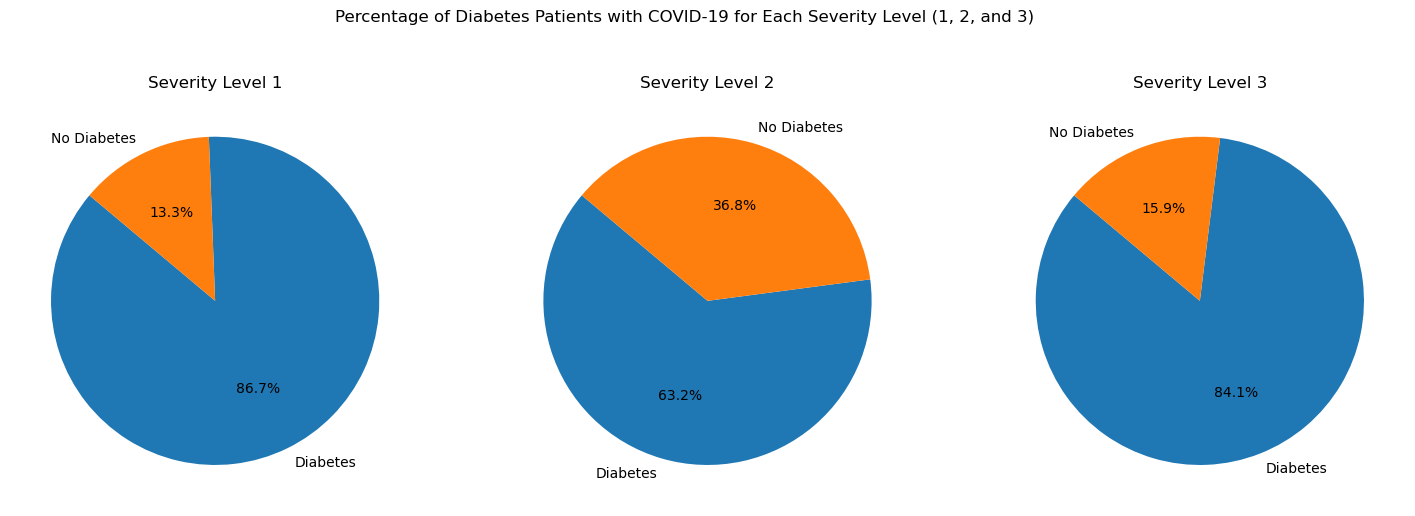

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('CovidData.csv')
covid_data = pd.read_csv('CovidData.csv')

# Filter the data for severity levels 1, 2, and 3
severity_levels = [1, 2, 3]
filtered_data = covid_data[covid_data['CLASIFFICATION_FINAL'].isin(severity_levels)]

# Assuming 'DIABETES' column: 1 indicates diabetes, 2 indicates no diabetes
# Filter out missing or not applicable data in 'DIABETES' column
diabetes_data = filtered_data[(filtered_data['DIABETES'] == 1) | (filtered_data['DIABETES'] == 2)]

# Function to create pie chart for each severity level for diabetes
def create_pie_chart_diabetes(severity_level, ax):
    # Filter data for the specific severity level
    severity_data = diabetes_data[diabetes_data['CLASIFFICATION_FINAL'] == severity_level]

    # Count the instances
    counts = severity_data['DIABETES'].value_counts()

    # Labels for the pie chart
    labels = ['Diabetes', 'No Diabetes']

    # Create the pie chart
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Severity Level {severity_level}')

# Create a figure with 3 subplots (one for each severity level)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie charts for each severity level
for i, severity_level in enumerate(severity_levels):
    create_pie_chart_diabetes(severity_level, axs[i])

fig.suptitle('Percentage of Diabetes Patients with COVID-19 for Each Severity Level (1, 2, and 3)')
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


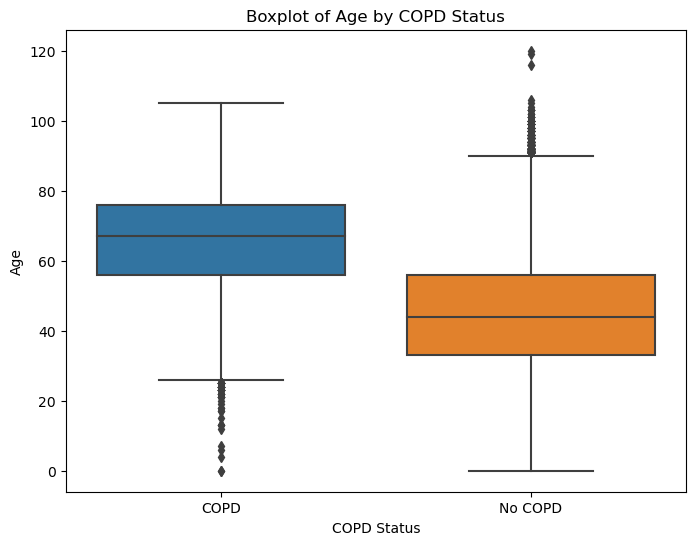

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('CovidData.csv')
covid_data = pd.read_csv('CovidData.csv')

# Filter the data for severity levels 1, 2, and 3
severity_levels = [1, 2, 3]
severity_data = covid_data[covid_data['CLASIFFICATION_FINAL'].isin(severity_levels) & 
                           covid_data['COPD'].isin([1, 2])]

# Prepare data for the boxplot
# For the boxplot, let's consider 'AGE' as a variable to compare across COPD status
age_copd = severity_data[['AGE', 'COPD']]

# Creating the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='COPD', y='AGE', data=age_copd)
plt.title('Boxplot of Age by COPD Status')
plt.xlabel('COPD Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['COPD', 'No COPD'])  # Set custom labels for x-axis
plt.show()


/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joetimmons/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

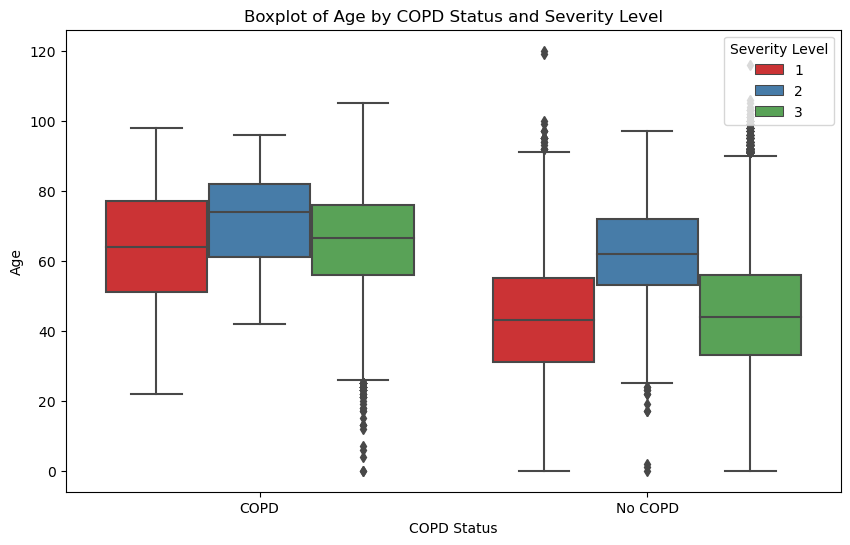

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('CovidData.csv')
covid_data = pd.read_csv('CovidData.csv')

# Filter the data for severity levels 1, 2, and 3
severity_levels = [1, 2, 3]
severity_data = covid_data[covid_data['CLASIFFICATION_FINAL'].isin(severity_levels) & 
                           covid_data['COPD'].isin([1, 2])]

# Filtering out rows where 'AGE' or 'COPD' values might be missing or invalid
age_copd_severity = severity_data[severity_data['AGE'].notna()]

# Creating the boxplot with severity levels as different colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='COPD', y='AGE', hue='CLASIFFICATION_FINAL', data=age_copd_severity, palette='Set1')
plt.title('Boxplot of Age by COPD Status and Severity Level')
plt.xlabel('COPD Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['COPD', 'No COPD'])  # Set custom labels for x-axis
plt.legend(title='Severity Level', loc='upper right')
plt.show()
